In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

In [30]:
data = pd.read_csv('/content/bitcoin_price_Training - bitcoin_price.2013Apr-2017Aug.csv.csv')

data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate

##ploting packages
import seaborn as sns
from matplotlib import pyplot 
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline
from datetime import datetime

## machine learning model packages 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [5]:
data.info() ## there is no null values in the given data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [31]:
## showing the head of the data 
data.head()


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [7]:
## tail of the data
data.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [8]:

data.shape ## viewing the shape of the data

(1556, 7)

In [9]:
## viewing the length of the data
len(data)

1556

In [10]:
data.index

RangeIndex(start=0, stop=1556, step=1)

In [32]:
data.rename(columns={'Market Cap': 'Market_cap'}, inplace=True)


In [37]:
## plotting the data

## market cap is in object need to convert numeric for plotting

data['Market_cap'] = pd.to_numeric(data['Market_cap'],errors='coerce' )



#weather["Temp"] = weather.Temp.convert_objects(convert_numeric=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market_cap  0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 85.2+ KB


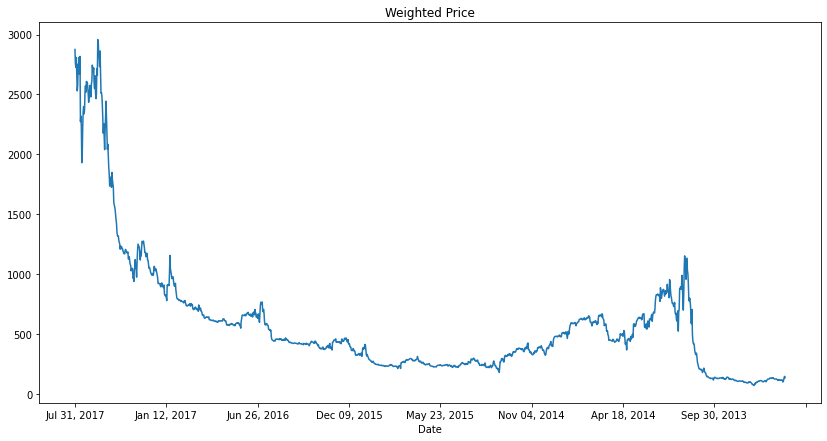

In [20]:
## closing price of the bitcon
data.set_index("Date").Close.plot(figsize=(14,7), title="Weighted Price")

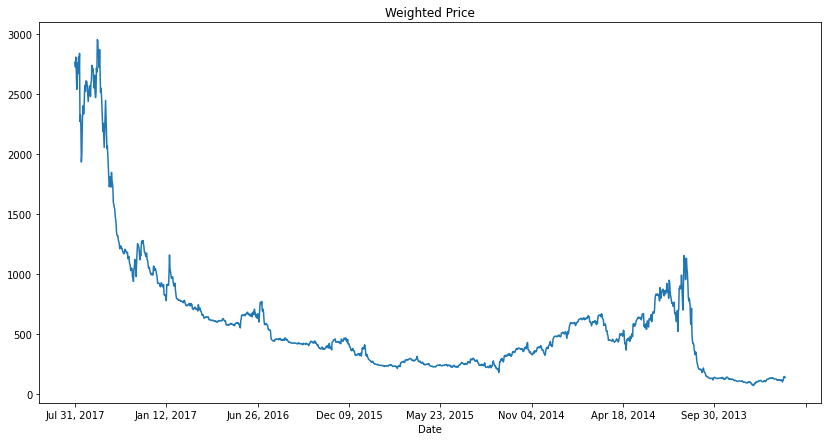

In [21]:
## open price of the bitcoin
data.set_index("Date").Open.plot(figsize=(14,7), title="Weighted Price")

In [25]:
data.head(1)

,Date,Open,High,Low,Close,Volume,Market_cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000",-9223372036854775808


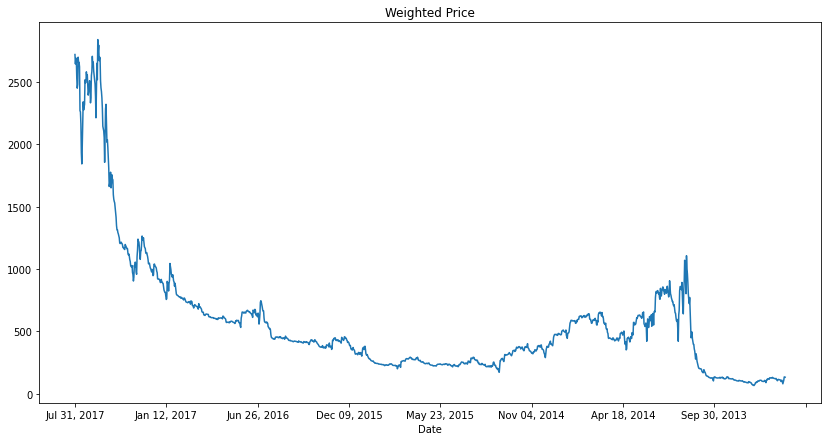

In [24]:
#low rate of the bitcoin 
data.set_index("Date").Low.plot(figsize=(14,7), title="Weighted Price")